# VRDL HW2

The notebook is for the assignment of **Selected Topics in Visual Recognition using Deep Learning, NCTU**, in fall 2020. 


## Directory structure

The data is placed as follow.

```
.
content
+-- svhn
|   +-- __init__.py
|   +-- utils.py
|   +-- svhn_dataextract_tojson.py
+-- faster_rcnn_r50_fpn_1x_svhn.py
.
```


## Download dataset

Download the given SVHN dataset.


In [1]:
!gdown -O test.zip 'https://drive.google.com/uc?export=download&id=1nswVLQSGupsRympzb3tUv3L94d7ADPmi'
!gdown -O train.tar.gz 'https://drive.google.com/uc?export=download&id=1UheRzvFHMCC2vWt5f9PTHMniRP6K_uug'
!unzip test.zip -d ./data
!tar -xzvf train.tar.gz -C ./data

Streaming output truncated to the last 5000 lines.
train/10099.png
train/10088.png
train/10017.png
train/9983.png
train/9849.png
train/9845.png
train/9810.png
train/9737.png
train/9732.png
train/9727.png
train/9725.png
train/9590.png
train/18326.png
train/18324.png
train/18300.png
train/18207.png
train/18201.png
train/18191.png
train/18159.png
train/18141.png
train/18129.png
train/18118.png
train/18056.png
train/18034.png
train/18023.png
train/17970.png
train/17952.png
train/17937.png
train/17870.png
train/17859.png
train/17830.png
train/17699.png
train/17662.png
train/17600.png
train/17599.png
train/17576.png
train/17546.png
train/17542.png
train/17541.png
train/17532.png
train/17511.png
train/17499.png
train/17465.png
train/17464.png
train/17424.png
train/17413.png
train/17397.png
train/17217.png
train/17209.png
train/17167.png
train/17151.png
train/17145.png
train/17085.png
train/17081.png
train/17057.png
train/17039.png
train/17019.png
train/16994.png
train/16940.png
train/16903.pn

In [2]:
!rm -rf sample_data
!rm -rf ./test.zip
!rm -rf ./train.tar.gz

In [3]:
!python /content/svhn/svhn_dataextract_tojson.py -f /content/data/train/digitStruct.mat -o digitStruct

python3: can't open file '/content/svhn/svhn_dataextract_tojson.py': [Errno 2] No such file or directory


## Install MMDetection

We use the MMDetection toolbox.

In [4]:
# Install dependencies
!pip install -U torch==1.6+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Install the latest mmcv
!pip install mmcv-full==latest+torch1.6.0+cu101 -f https://download.openmmlab.com/mmcv/dist/index.html

"""
# Install albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"
"""

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirements/build.txt
!pip install -e .

"""
# Install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0
"""

# Check Pytorch installation
import torch, torchvision

print(torch.__version__, torch.cuda.is_available())


# Check MMDetection installation
import mmdet

print(mmdet.__version__)


# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print(get_compiling_cuda_version())
print(get_compiler_version())

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 25kB/s 
     |████████████████████████████████| 5.9MB 47.2MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
Looking in links: https://download.openmmlab.com/mmcv/dist/index.html
     |████████████████████████████████| 18.4MB 168kB/s 
     |████████████████████████████████| 194kB 10.8MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 14482, done.
remote: Total 14482 (delta 0), reused 0 (delta 0), pack-reused 14482
Receiving objects: 100% (14482/14482), 14.21 MiB | 4.58 MiB/s, done.
Resolving deltas: 100% (9853/9853), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Created wheel for mmpycocotools: filen

In [5]:
%cd ..

/content


## Convert dataset to COCO format

We convert the dataset to COCO format for later use for MMDetection detection model.

In [9]:
!python /content/svhn/svhn_dataextract_tojson.py -f /content/data/train/digitStruct.mat -o digitStruct

Starting get all digit structure
100% 33402/33402 [03:37<00:00, 153.56it/s]
Starting pack josn dict
100% 33402/33402 [00:00<00:00, 200990.39it/s]


In [18]:
import svhn.utils as utils

In [7]:
categories=[{'id': 1, 'name': '1'},
            {'id': 2, 'name': '2'},
            {'id': 3, 'name': '3'},
            {'id': 4, 'name': '4'},
            {'id': 5, 'name': '5'},
            {'id': 6, 'name': '6'},
            {'id': 7, 'name': '7'},
            {'id': 8, 'name': '8'},
            {'id': 9, 'name': '9'},
            {'id': 10, 'name': '0'}]

In [10]:
utils.split_train_val_to_annotaion('/content/digitStruct.json',
                                   '/content/data/train/annotation_coco_train.json',
                                   '/content/data/train/annotation_coco_val.json',
                                   '/content/data/train',
                                   categories)

[>>>>>>>>>>>>>>>>>>>>>>>>] 26722/26722, 286.2 task/s, elapsed: 93s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 6680/6680, 406.8 task/s, elapsed: 16s, ETA:     0s


In [11]:
utils.create_digitStruct_nobbox('/content/data/test',
                                '/content/digitStruct_test.json')

[>>>>>>>>>>>>>>>>>>>>>>>>] 13068/13068, 558.8 task/s, elapsed: 23s, ETA:     0s


In [12]:
utils.convert_digitStruct_to_COCO('/content/digitStruct_test.json',
                                  '/content/data/test/annotation_coco_test.json',
                                  '/content/data/test',
                                  categories)

[>>>>>>>>>>>>>>>>>>>>>>>>] 13068/13068, 319.8 task/s, elapsed: 41s, ETA:     0s


**After all the process, the directory structure should be like**

```
.
content
+-- svhn
|   +-- __init__.py
|   +-- utils.py
|   +-- svhn_dataextract_tojson.py
+-- faster_rcnn_r50_fpn_1x_svhn.py
+-- mmdetection
+-- data
|   +-- train
|   |   +-- 1.png
|   |   +-- 2.png
|   |   +-- ...
|   |   +-- digitStruct.mat
|   |   +-- annotation_coco_train
|   |   +-- annotation_coco_val
|   +-- test
|   |   +-- 1.png
|   |   +-- 2.png
|   |   +-- ...
|   |   +-- annotation_coco_test
+-- ...
.
```

## Train

Uncomment the cell below can run the train porcess.

In [ ]:
# !python /content/mmdetection/tools/train.py /content/faster_rcnn_r50_fpn_1x_svhn.py

## Test

Download the checkpoint and put it as follow, then we can run test process.

```
content
+-- work_dirs
|   +-- faster_rcnn_r50_fpn_1x_svhn
|   |   +-- **checkpoint.pth**
```

In [15]:
!rm -rf /content/work_dirs
!mkdir /content/work_dirs
!mkdir /content/work_dirs/faster_rcnn_r50_fpn_1x_svhn

In [16]:
# Download the checkpoint
!gdown -O /content/work_dirs/faster_rcnn_r50_fpn_1x_svhn/epoch_12.pth 'https://drive.google.com/uc?export=download&id=1-NgPX85Eb0IGGFyM0Lb4kxlAqfhLqvhk'

Downloading...
From: https://drive.google.com/uc?export=download&id=1-NgPX85Eb0IGGFyM0Lb4kxlAqfhLqvhk
To: /content/work_dirs/faster_rcnn_r50_fpn_1x_svhn/epoch_12.pth
331MB [00:02, 145MB/s]


In [19]:
!python /content/mmdetection/tools/test.py /content/faster_rcnn_r50_fpn_1x_svhn.py /content/work_dirs/faster_rcnn_r50_fpn_1x_svhn/epoch_12.pth --format-only --options "jsonfile_prefix=./results"

/content/mmdetection/tools/test.py:92: UserWarning: --options is deprecated in favor of --eval-options
  warnings.warn('--options is deprecated in favor of --eval-options')
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
[>>] 13068/13068, 21.3 task/s, elapsed: 614s, ETA:     0s

In [42]:
# Convert test output to submission format
utils.bbox_json_to_submission('/content/results.bbox.json',
                              '/content/data/test/annotation_coco_test.json',
                              '/content/submission.json',
                              score_thr=0.5)

## Visulization

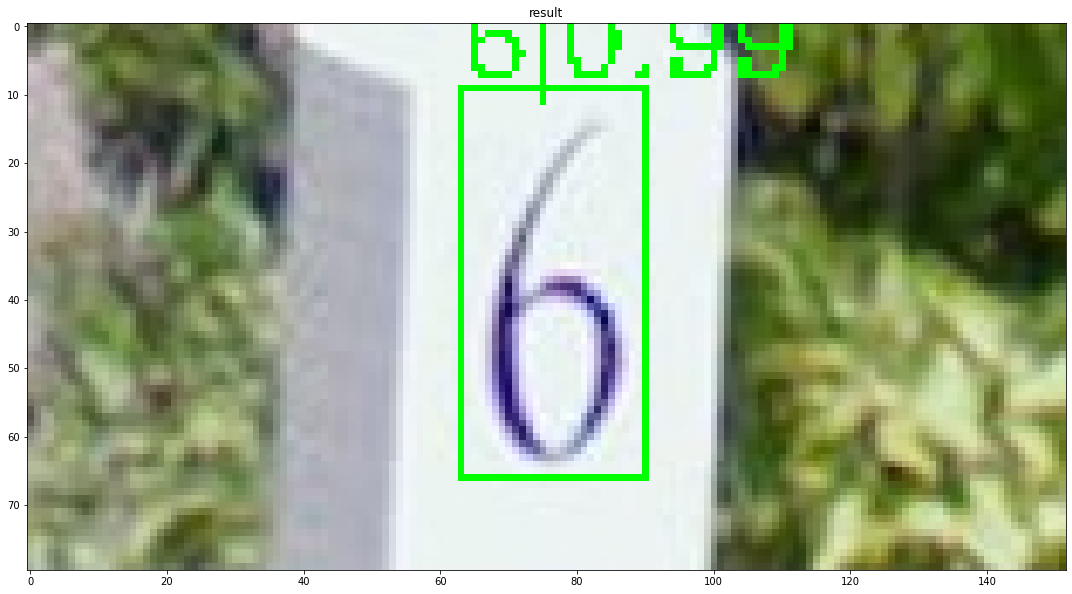

In [39]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

config_file = '/content/faster_rcnn_r50_fpn_1x_svhn.py'
checkpoint_file = '/content/work_dirs/faster_rcnn_r50_fpn_1x_svhn/epoch_12.pth'

model = init_detector(config_file, checkpoint_file, device='cuda:0')
img = '/content/data/test/2549.png'
img = mmcv.imread(img)
result = inference_detector(model, img)

show_result_pyplot(model=model, img=img, result=result, score_thr=0.5, fig_size=(15, 10))

## Speed benchmark

In [40]:
img = '/content/data/test/2549.png'
img = mmcv.imread(img)

In [41]:
%%timeit

inference_detector(model, img)

10 loops, best of 3: 47 ms per loop
